# Machine Intelligence II (week 4) - Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

## Exercise 1
### A

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io.wavfile

In [2]:
sig = np.loadtxt("sound1.dat")
# sound1 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
sound1 = sig
scipy.io.wavfile.write("sound1_orig.wav", 8192, sound1)

sig = np.loadtxt("sound2.dat")
sound2 = sig
# sound2 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
scipy.io.wavfile.write("sound2_orig.wav", 8192, sound2)

sounds = np.array([sound1, sound2])

### B

In [3]:
A = np.random.random((2, 2))
A_inv = np.linalg.inv(A)
xsounds = np.dot(A, sounds)
# xsounds = mixed sounds
scipy.io.wavfile.write("sound1_mixed.wav", 8192, xsounds[0])
scipy.io.wavfile.write("sound2_mixed.wav", 8192, xsounds[1])

### C

In [4]:
neworder = np.random.permutation(np.arange(18000)) 
pxsounds = xsounds[:, np.asarray(neworder)]

# pxsounds = permutated mixed sounds
scipy.io.wavfile.write("sound1_mixed_perm.wav", 8192, pxsounds[0])
scipy.io.wavfile.write("sound2_mixed_perm.wav", 8192, pxsounds[1])

### D

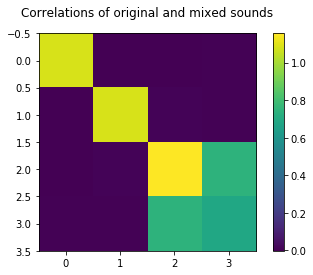

In [5]:
correlation = np.cov(sounds, pxsounds) / np.std(sounds) / np.std(pxsounds)
plt.imshow(correlation, interpolation='none')
plt.title('Correlations of original and mixed sounds',y=1.05)
plt.colorbar();

### E

In [6]:
# cpxsounds = centered permutated mixed sounds
cpxsounds = (pxsounds.T - np.mean(pxsounds, 1)).T           

# cxsounds = centered mixed sounds
cxsounds = xsounds - np.mean(xsounds,1)[:,np.newaxis]

## Exercise 2
### A

In [7]:
def ddf_by_df(inp):
    return 1-2.0/(1+np.exp(-inp))

W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)
k = 0
W_store=np.zeros((18,2,2))
eta_0 = .8
for t in range(18000):
    eta = eta_0/(t+1)
    W_inv = np.linalg.inv(W)
    x = cxsounds[:,t]
    gradient = W_inv.T + np.dot(ddf_by_df(np.dot(W,x)).reshape(2,1),x.reshape(1,2))#ddf_by_df(np.dot(W,x))[:,np.newaxis]*x
    W += eta*gradient
    if t%1000==0:
        W_store[k]=W
        k+=1
print("W end")
print(W)
W_reg_store = W_store
W_regular = W

Goal:
[[-1.09810094  2.17424423]
 [ 1.38195096 -0.71643238]]
W start
[[ 0.45376183  0.29324194]
 [ 0.56125601  0.53729305]]
W end
[[ 5.9958921  -4.99566559]
 [-2.21918382  5.12403184]]


### B

In [8]:
W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)
eta_0 = .35
k = 0
W_store=np.zeros((18,2,2))
for t in range(18000):
    x = cxsounds[:,t]
    gradient = np.dot(np.eye(2) + np.dot(ddf_by_df(np.dot(W,x)).reshape(2,1),np.dot(W,x).reshape(1,2)),W)#np.dot(ddf_by_df(np.dot(W,x)),np.dot(W,x)[:,np.newaxis]),W)
    eta = eta_0/(t+1)
    W += eta*gradient
    if t%1000==0:
        W_store[k]=W
        k+=1
print("W end")
print(W)
W_nat_store = W_store
W_natural = W

Goal:
[[-1.09810094  2.17424423]
 [ 1.38195096 -0.71643238]]
W start
[[ 0.89608355  0.60479543]
 [ 0.04601271  0.51199916]]
W end
[[ 0.84778643  1.4167147 ]
 [-2.79347345  3.58213327]]


In [9]:
natural_unmixed = np.dot(W_natural, cxsounds)
regular_unmixed = np.dot(W_regular, cxsounds)

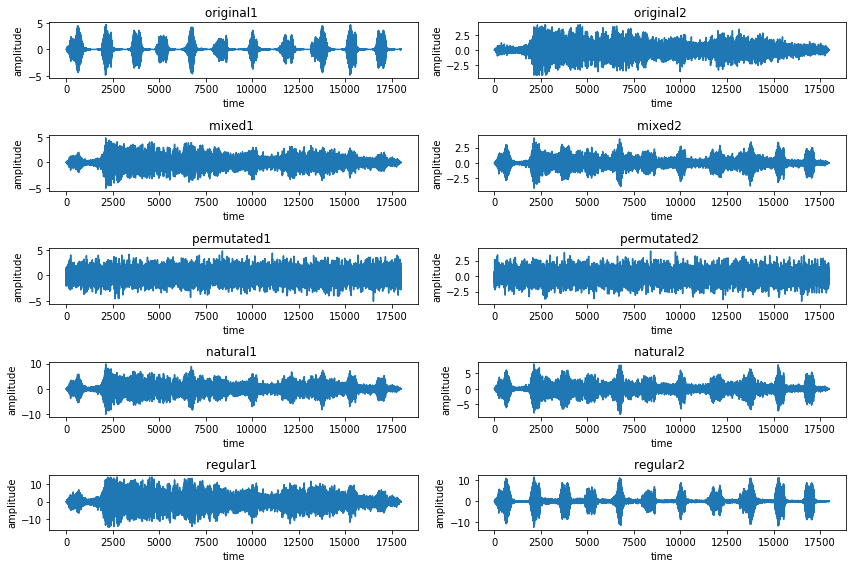

In [10]:
fig, axs = plt.subplots(5,2, figsize = (12,8))
for i in range(2):
    
    axs[0][i].plot(sounds[i])    
    axs[1][i].plot(cxsounds[i])
    axs[2][i].plot(cpxsounds[i])
    axs[3][i].plot(natural_unmixed[i])
    axs[4][i].plot(regular_unmixed[i])
    axs[0][i].set_title('original{} '.format(i+1))
    axs[1][i].set_title('mixed{} '.format(i+1))
    axs[2][i].set_title('permutated{} '.format(i+1))
    axs[3][i].set_title('natural{} '.format(i+1))
    axs[4][i].set_title('regular{} '.format(i+1))
    
plt.setp(axs, xlabel = 'time', ylabel = 'amplitude');
fig.tight_layout()
plt.show()

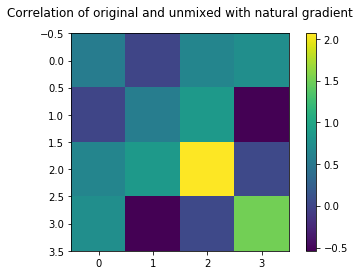

In [11]:
correlation = np.cov(sounds, natural_unmixed) / np.std(sounds) / np.std(natural_unmixed)
plt.imshow(correlation, interpolation='none')
plt.title('Correlation of original and unmixed with natural gradient',y=1.05)
plt.colorbar();

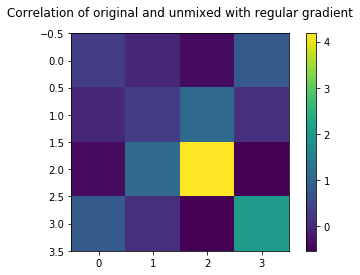

In [12]:
correlation = np.cov(sounds, regular_unmixed) /(np.std(sounds)*np.std(regular_unmixed))
plt.imshow(correlation, interpolation='none')
plt.title('Correlation of original and unmixed with regular gradient',y=1.05)
plt.colorbar();

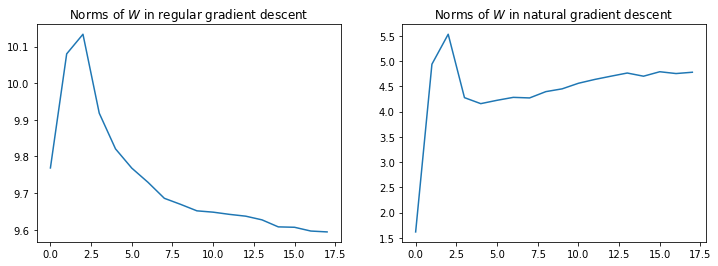

In [13]:
W_reg_norms = np.linalg.norm(W_reg_store,axis=(2,1))
W_nat_norms = np.linalg.norm(W_nat_store,axis=(2,1))

fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(W_reg_norms)
axs[0].set_title('Norms of $W$ in regular gradient descent')
axs[1].plot(W_nat_norms)
axs[1].set_title('Norms of $W$ in natural gradient descent')


In [14]:
white1 = (sound1-np.mean(sound1))/np.std(sound1)
white2 = (sound2-np.mean(sound1))/np.std(sound2)
white = np.vstack((white1,white2))
mixed_white = np.dot(A,white)

In [15]:
def ddf_by_df(inp):
    return 1-2.0/(1+np.exp(-inp))

W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)
k = 0
wW_store=np.zeros((18,2,2))
eta_0 = .8
for t in range(18000):
    eta = eta_0/(t+1)
    W_inv = np.linalg.inv(W)
    x = mixed_white[:,t]
    gradient = W_inv.T + np.dot(ddf_by_df(np.dot(W,x)).reshape(2,1),x.reshape(1,2))#ddf_by_df(np.dot(W,x))[:,np.newaxis]*x
    W += eta*gradient
    if t%1000==0:
        wW_store[k]=W
        k+=1
print("W end")
print(W)
wW_reg_store = wW_store
wW_regular = W

Goal:
[[-1.09810094  2.17424423]
 [ 1.38195096 -0.71643238]]
W start
[[ 0.2701082   0.68273953]
 [ 0.57347687  0.77184276]]
W end
[[-2.78773978  4.30023938]
 [ 3.20057429 -0.70738559]]


In [16]:
W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)
eta_0 = .35
k = 0
wW_store=np.zeros((18,2,2))
for t in range(18000):
    x = mixed_white[:,t]
    gradient = np.dot(np.eye(2) + np.dot(ddf_by_df(np.dot(W,x)).reshape(2,1),np.dot(W,x).reshape(1,2)),W)#np.dot(ddf_by_df(np.dot(W,x)),np.dot(W,x)[:,np.newaxis]),W)
    eta = eta_0/(t+1)
    W += eta*gradient
    if t%1000==0:
        wW_store[k]=W
        k+=1
print("W end")
print(W)
wW_nat_store = wW_store
wW_natural = W

Goal:
[[-1.09810094  2.17424423]
 [ 1.38195096 -0.71643238]]
W start
[[ 0.07295304  0.39189769]
 [ 0.95801431  0.82678141]]
W end
[[-2.54346516  3.16830071]
 [ 0.73067324  1.55703296]]


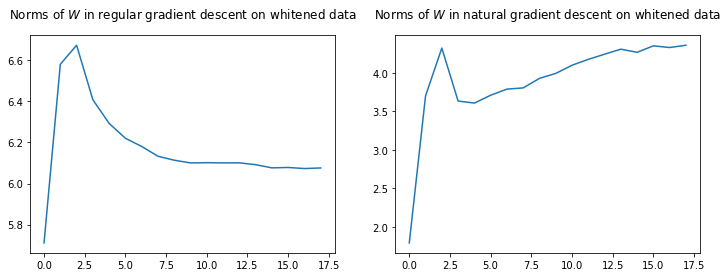

In [17]:
wW_reg_norms = np.linalg.norm(wW_reg_store,axis=(2,1))
wW_nat_norms = np.linalg.norm(wW_nat_store,axis=(2,1))

fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(wW_reg_norms)
axs[0].set_title('Norms of $W$ in regular gradient descent on whitened data',y=1.05);
axs[1].plot(wW_nat_norms)
axs[1].set_title('Norms of $W$ in natural gradient descent on whitened data',y=1.05);

The natural gradient descrent is in principle a lot faster since it avoids costly matrix inversion. In this example it didn not matter much since the signal came in from only two sources so the unmixing matrix is very small.
The speed at which the algorithms converge does not differ notably in our example however since the unmixing was unsuccesful it is likely that this could be an accident.
Notably both versions of the algorithm converge a lot faster when applied on the whitened data.